<a href="https://colab.research.google.com/github/radhika004/CustomerSupportTickets/blob/main/submission_1%7C_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
data = pd.read_csv("/content/customer_support.csv")

In [ ]:
data.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
2,1006966905046,Dringend: Unterstützung für die Datenwiederher...,"Hallo, wir haben severe Datenverluste in MySQL...","Hallo, vielen Dank, dass Sie uns kontaktiert h...",Incident,Technical Support,high,de,IT Services,Data Breach,Backup Restore,Technical Support,Urgent Issue,Software Bug,Problem Resolution,NaN,NaN,NaN
3,1009231330404,Anfrage zu den MacBook Air M1 Funktionen,"Sehr geehrtes Kundenserviceteam,\n\n\nich hoff...","Sehr geehrter <name>,\n\n\nvielen Dank für Ihr...",Request,Sales and Pre-Sales,low,de,Tech Online Store,Customer Service,Product Support,Sales Inquiry,Technical Guidance,Warranty Claim,General Inquiry,NaN,NaN,NaN
4,1024440081041,Solicitação de Assistência com Erro de Instala...,"Caro Suporte ao Cliente,\n\n\nEstou enfrentand...","Caro <name>,\n\n\nObrigado por entrar em conta...",Problem,Technical Support,medium,pt,IT Services,Technical Support,Software Bug,Urgent Issue,Problem Resolution,Product Support,NaN,NaN,NaN,NaN


In [ ]:
data_en = data.loc[data["language"].eq("en"),:]
data_en.head()

,id,subject,body,answer,type,queue,priority,language,business_type,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9
0,1001352387736,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin...",Subject: Re: Urgent: Critical impact on enterp...,Incident,Technical Support,high,en,IT Services,Service Outage,Network Issue,Urgent Issue,Technical Support,Problem Resolution,Critical Failure,System Crash,Service Disruption,NaN
1,1004699418379,Intermittent Cursor Freezing Issue on Dell XPS,"Dear Customer Support,<br><br>I hope this mess...","Dear <name>,\n\n\nThank you for reaching out r...",Incident,Product Support,low,en,Tech Online Store,Technical Support,Product Support,Hardware Failure,Problem Resolution,Urgent Issue,Service Recovery,Documentation Request,NaN,NaN
5,1024619926727,Exchange Request for Malfunctioning Dell XPS 13,"Dear Tech Online Store Customer Support,\n\n\n...","Dear <name>,\n\n\nThank you for reaching out a...",Change,Returns and Exchanges,medium,en,Tech Online Store,Returns and Exchanges,Product Replacement,Customer Service,Technical Support,Order Issue,NaN,NaN,NaN,NaN
6,1026487543175,Request for Server Administration Assistance,"Dear IT Services Customer Support, \n\n\nWe ar...",Subject: Re: Request for Server Administration...,Request,Product Support,medium,en,IT Services,Technical Support,IT Support,Performance Tuning,Problem Resolution,Technical Guidance,Service Recovery,NaN,NaN,NaN
7,1027850274374,Immediate Attention Required: AWS Outage Concern,"Greetings IT Services Customer Support,\n\n\nI...","Hello <name>,\n\n\nWe appreciate you informing...",Incident,Technical Support,high,en,IT Services,Service Outage,Urgent Issue,IT Support,System Maintenance,Incident Report,Customer Service,NaN,NaN,NaN


In [ ]:
# subject and body
tickets = data_en.loc[:, ["subject", "body"]].apply(lambda x: f"subject: {x['subject']} \n\n\n Body: {x['body']}", axis=1)


In [ ]:
# subject and answer
ticket_answer = data_en.loc[:,["subject","answer"]].apply(lambda x:f"subject:{x['subject']} \n answer:{x['answer']}",axis=1)


In [ ]:
print(tickets[0])

subject: Urgent: Critical impact on enterprise network connectivity 


 Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>


In [ ]:
print(ticket_answer[0])

subject:Urgent: Critical impact on enterprise network connectivity 
 answer:Subject: Re: Urgent: Critical impact on enterprise network connectivity


Dear <name>,


Thank you for reaching out to us regarding the critical outage affecting your Cisco Router ISR4331.


We understand the urgency and impact of this issue on your operations. Our technical support team is prioritizing your case and will promptly begin diagnosing the problem to facilitate a quick resolution.


Please ensure all relevant technical logs are available for our team to access, which will assist in expediting the diagnostic process. We will maintain close communication and provide updates as our investigation proceeds.


Your patience and cooperation are greatly appreciated, and we're committed to resolving this matter as swiftly as possible.


Best regards,


Customer Support Team


In [ ]:
# removing stop words and applying lammetization

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and word.isalnum()]
    return " ".join(words)

processed_tickets = tickets.apply(preprocess_text)

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(processed_tickets)

tfidf_matrix

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


<339x1936 sparse matrix of type '<class 'numpy.float64'>'
	with 16786 stored elements in Compressed Sparse Row format>

In [ ]:
# PCAs

from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(tfidf_matrix.toarray())
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])

pca_df

,PC1,PC2,PC3
0,-0.130984,0.319533,0.020532
1,-0.150997,-0.151325,0.059677
2,-0.161961,-0.268909,0.074006
3,0.065946,-0.026010,-0.313476
4,0.203016,0.111567,0.009834
...,...,...,...
334,0.240192,0.098514,0.121834
335,0.107350,0.119993,-0.295124
336,-0.210467,0.343919,0.094171
337,-0.151002,-0.226354,0.102842


In [ ]:
# combine and form token of tags

import pandas as pd

def combine_tags(row):
    tags = []
    for i in range(1, 10):  # Assuming tags are from tag_1 to tag_9
        tag_col = f"tag_{i}"
        if tag_col in row and pd.notna(row[tag_col]):
            tags.append(str(row[tag_col]))
    return " ".join(tags)

data_en['combined_tags'] = data_en.apply(combine_tags, axis=1)

# Calculate value counts for unique strings of combined tags
tag_counts = data_en['combined_tags'].value_counts().reset_index()
tag_counts.columns = ['combined_tags', 'count']

tag_counts

<ipython-input-16-1371f4c4e4a3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['combined_tags'] = data_en.apply(combine_tags, axis=1)


,combined_tags,count
0,Technical Support Product Support IT Support P...,3
1,Technical Support Product Support General Inqu...,2
2,Technical Support Urgent Issue Software Bug Pr...,2
3,Network Issue Technical Support Urgent Issue P...,2
4,Urgent Issue IT Support Service Disruption Inc...,2
...,...,...
327,Product Support Technical Support Warranty Cla...,1
328,IT Support Urgent Issue Network Issue Technica...,1
329,Technical Support Urgent Issue Problem Resolut...,1
330,Technical Support Urgent Issue Software Bug Ac...,1


In [ ]:
!pip install nltk
import nltk
nltk.download('punkt_tab')
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
def preprocess_and_tokenize_tags(row):
    """Combines and tokenizes tags from tag_1 to tag_4."""
    tag_columns = [f"tag_{i}" for i in range(1, 4)]
    tags = " ".join(str(row[col]) for col in tag_columns if pd.notna(row[col]) and row[col] != '')

    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    nltk.download('wordnet', quiet=True)

    tokens = nltk.word_tokenize(tags.lower())
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words and token.isalnum()]  # Keep only alphanumeric tokens

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    return " ".join(sorted(set(tokens)))

data_en['combined_tags'] = data_en.apply(preprocess_and_tokenize_tags, axis=1)
data_en['combined_tags'].value_counts()


<ipython-input-18-1cf58d476687>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_en['combined_tags'] = data_en.apply(preprocess_and_tokenize_tags, axis=1)


,count
combined_tags,
failure hardware product support technical,19
issue network support technical urgent,18
disruption issue service support technical urgent,17
bug product software support technical,16
bug issue software support technical urgent,12
...,...
exchange product replacement return support technical,1
guidance notification service support technical,1
customer product service support technical,1


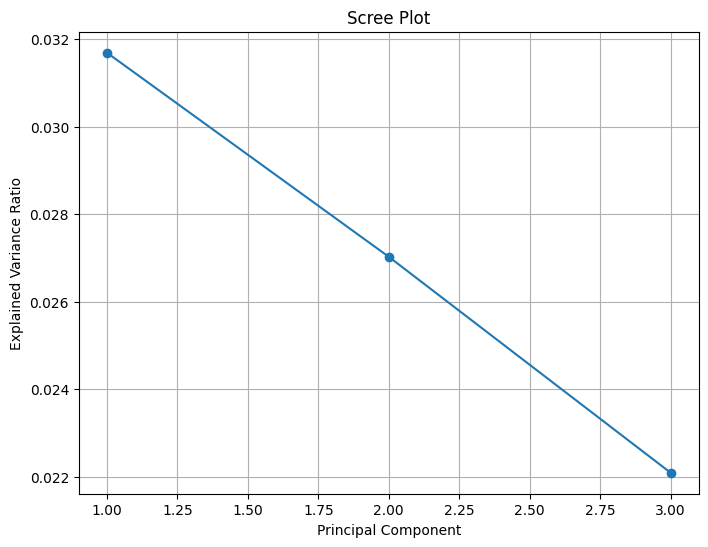

In [ ]:
# PCA variance plot

import matplotlib.pyplot as plt

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

In [ ]:
# plot 3 PCAs for answer column
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=data_en['tag_1'])
fig.show()

In [ ]:
import plotly.express as px

fig = px.scatter_3d(pca_df, x='PC1', y='PC2', z='PC3', color=data_en.index)
fig.show()

In [ ]:
data_en.loc[[48, 59], ["subject"]].values

array([['Urgent: User unable to join scheduled Zoom meeting'],
       ['Urgent Assistance Needed for Zoom Issues']], dtype=object)

In [ ]:
data_en.loc[[980, 817, 293, 433, 43, 633], ["subject"]].values


array([['Urgent Issue with AWS Deployment'],
       ['Immediate Attention Required'],
       ['Urgent Assistance Needed for AWS Access Issue'],
       ['Critical: Significant AWS Service Disruption'],
       ['Urgent AWS Connectivity Issue'],
       ['Urgent: AWS Downtime Issue']], dtype=object)

In [ ]:
data_en.loc[[26, 518, 980, 1173, 1512], ["subject"]].values

array([['Urgent Care Needed: Issue with AWS Deployment'],
       ['Critical: Problem with AWS Deployment'],
       ['Urgent Issue with AWS Deployment'],
       ['Urgent Assistance Needed: Issue with AWS Deployment'],
       ['Urgent Assistance Required: Issue with AWS Deployment']],
      dtype=object)

In [ ]:
data_en.loc[[1346, 1324, 1330, 1343], ["subject"]].values

array([['Help with Printer Configuration'],
       ['Immediate Help Required'],
       ['Seeking Assistance: Router Leading to Network Disruptions'],
       ['Immediate Support Required: Cisco ISR4331 Router Outage']],
      dtype=object)

In [ ]:
data_en.loc[[194, 626, 536, 906, 53, 931], ["subject"]].values

array([['Assistance Needed for Printer Setup'],
       ['Help Needed: Printer Connection Problem'],
       ['Request for Printer Exchange'],
       ['Help Needed for Printer Connection Issue'],
       ['Wi-Fi Connectivity Issues with Canon PIXMA MG3620 Printer'],
       ['Issue with Canon PIXMA MG3620 Wi-Fi Connection']], dtype=object)

In [ ]:
#  3d tsne of tfidf_matrix.toarray() and plot a 3d plotly express graph assign index for each color

import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color=data_en.index)
fig.show()

In [ ]:
# prompt:3d tsne of tfidf_matrix.toarray() and plot a 3d plotly express graph assign index for each color

import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3, random_state=0)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2', 'TSNE3'])

fig = px.scatter_3d(tsne_df, x='TSNE1', y='TSNE2', z='TSNE3', color=data_en['combined_tags'])
fig.show()

In [ ]:
# use sentence embedder to embedd tickets

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer

# Load the Sentence Transformer model
model = SentenceTransformer('all-mpnet-base-v2')


# Generate embeddings
ticket_embeddings = model.encode(tickets.tolist())




/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
# pc1, 2 3 for ticket_embeddings and plot

import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pc_result = pca.fit_transform(ticket_embeddings)
pc_df = pd.DataFrame(data=pc_result, columns=['PC1', 'PC2', 'PC3'])

fig = px.scatter_3d(pc_df, x='PC1', y='PC2', z='PC3', color=data_en['combined_tags'])
fig.show()

In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [ ]:
def get_all_nouns(el):
    doc = nlp(el)
    tokens = [(token.text, token.pos_) for token in doc]

    final_nouns = []
    curr_noun = ""
    with_occured = False
    for el in tokens:
        if el[0] == "with":
            with_occured = True
        elif el[1] not in ["NOUN", "PROPN"]:
            with_occured = False

        if el[1] in ["NOUN", "PROPN"] and with_occured:
            curr_noun += " " + el[0]
        else:
            if curr_noun != "":
                final_nouns.append(curr_noun.strip())
                curr_noun = ""

    if curr_noun != "":
        final_nouns.append(curr_noun.strip())

    return final_nouns

data_en["nouns"] = data_en["subject"].apply(get_all_nouns)

<ipython-input-32-13ac4fa8d544>:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
data_en.loc[data_en["nouns"].map(len) > 0, "nouns"].shape

(58,)

In [ ]:
data_en.loc[data_en["nouns"].map(len) > 0, "nouns"]

,nouns
18,[AWS Resource Optimization]
26,[AWS Deployment]
49,[Dell XPS]
53,[Canon PIXMA MG3620 Printer]
72,[AWS Management Service Deployment]
74,[Cisco Router]
95,[HP DeskJet]
107,[AWS Management Service]
127,[Surface Pro]
129,[Dell XPS]


Group tickets where the same nouns occured

In [ ]:
# from tickets group body of   same nouns occured in multiple groups

import pandas as pd


def group_tickets_by_nouns(df):
    """Groups tickets based on common nouns in the 'subject' field."""

    grouped_tickets = {}
    for index, row in df.iterrows():
        if isinstance(row['nouns'], list) and row['nouns']:  # Check for valid 'nouns' lists
            for noun in row['nouns']:
                if noun not in grouped_tickets:
                    grouped_tickets[noun] = []
                grouped_tickets[noun].append(index)

    return grouped_tickets


def print_grouped_tickets(grouped_tickets):
    """Prints groups of ticket indices based on common nouns."""
    for noun, ticket_indices in grouped_tickets.items():
        print(f"Noun: {noun}")
        print(f"Ticket indices: {ticket_indices}")
        print("-" * 20)


# Apply the function
grouped = group_tickets_by_nouns(data_en)

# Print the results
print_grouped_tickets(grouped)

Noun: AWS Resource Optimization
Ticket indices: [18]
--------------------
Noun: AWS Deployment
Ticket indices: [26, 518, 980, 1173, 1512]
--------------------
Noun: Dell XPS
Ticket indices: [49, 129, 253, 480, 725, 1101]
--------------------
Noun: Canon PIXMA MG3620 Printer
Ticket indices: [53]
--------------------
Noun: AWS Management Service Deployment
Ticket indices: [72]
--------------------
Noun: Cisco Router
Ticket indices: [74, 176, 461]
--------------------
Noun: HP DeskJet
Ticket indices: [95, 225, 653]
--------------------
Noun: AWS Management Service
Ticket indices: [107, 1340]
--------------------
Noun: Surface Pro
Ticket indices: [127, 283, 448]
--------------------
Noun: MacBook Air M1
Ticket indices: [130]
--------------------
Noun: Adobe Photoshop
Ticket indices: [143, 338, 847]
--------------------
Noun: Zoom application
Ticket indices: [146]
--------------------
Noun: Microsoft Surface Pro
Ticket indices: [202, 342]
--------------------
Noun: Wireless Printing
Ticket 

In [ ]:


import pandas as pd
import spacy


def group_tickets_by_nouns(df):
    """Groups tickets based on common nouns in the 'subject' and 'body' fields."""

    grouped_tickets = {}
    for index, row in df.iterrows():
        if isinstance(row['nouns'], list) and row['nouns']:
            for noun in row['nouns']:
                if noun not in grouped_tickets:
                    grouped_tickets[noun] = []
                grouped_tickets[noun].append((index, row['subject'], row['body']))

    return grouped_tickets


def print_grouped_tickets(grouped_tickets):
    """Prints groups of ticket indices based on common nouns, including subject and body."""
    for noun, ticket_data in grouped_tickets.items():
        print(f"Noun: {noun}")
        for index, subject, body in ticket_data:
            print(f"  Ticket Index: {index}")
            print(f"  Subject: {subject}")
            print(f"  Body: {body}")
            print("-" * 20)


# Apply the function
grouped = group_tickets_by_nouns(data_en)

# Print the results
print_grouped_tickets(grouped)

Noun: AWS Resource Optimization
  Ticket Index: 18
  Subject: Issues with AWS Resource Optimization
  Body: Dear IT Services Support,


I am writing to inform you about significant challenges we are experiencing with AWS resource optimization under the AWS Management Service. The core issues revolve around ineffective cost management and the need for robust infrastructure adaptation strategies. Our current setup does not allow for efficient monitoring and scaling, resulting in escalating costs and inadequate resource utilization.


We require immediate assistance in identifying areas for improvement and reformulating our resource management approach to ensure streamlined operations and cost-effectiveness. A comprehensive evaluation of our current AWS infrastructure might be necessary.


Please let us know how we can proceed at your earliest convenience. Thank you for your attention to this matter.


Sincerely,
<name>
<acc_num>
<tel_num>
--------------------
Noun: AWS Deployment
  Ticke

In [ ]:


def group_tickets_by_nouns(df):
    """Groups tickets based on common nouns in the 'subject' field,
       displaying only unique subjects for each noun."""

    grouped_tickets = {}
    for index, row in df.iterrows():
        if isinstance(row['nouns'], list) and row['nouns']:
            for noun in row['nouns']:
                if noun not in grouped_tickets:
                    grouped_tickets[noun] = set()
                grouped_tickets[noun].add(row['subject'])

    return grouped_tickets


def print_grouped_tickets(grouped_tickets):
    """Prints groups of unique subjects based on common nouns."""
    for noun, subjects in grouped_tickets.items():
        print(f"Noun: {noun}")
        for subject in subjects:
            print(f"  Subject: {subject}")
        print("-" * 20)


# Apply the function
grouped = group_tickets_by_nouns(data_en)

# Print the results
print_grouped_tickets(grouped)

Noun: AWS Resource Optimization
  Subject: Issues with AWS Resource Optimization
--------------------
Noun: AWS Deployment
  Subject: Urgent Assistance Required: Issue with AWS Deployment
  Subject: Urgent Care Needed: Issue with AWS Deployment
  Subject: Critical: Problem with AWS Deployment
  Subject: Urgent Issue with AWS Deployment
  Subject: Urgent Assistance Needed: Issue with AWS Deployment
--------------------
Noun: Dell XPS
  Subject: Screen Flickering Issue with Dell XPS 13
  Subject: Request for urgent assistance with Dell XPS 13 issues
  Subject: Issue with Dell XPS 13 Powering On
  Subject: Issue with Dell XPS 13 overheating
  Subject: Issue with Dell XPS 13 9310 Performance
  Subject: Performance Issue with Dell XPS 13 9310 Demo
--------------------
Noun: Canon PIXMA MG3620 Printer
  Subject: Wi-Fi Connectivity Issues with Canon PIXMA MG3620 Printer
--------------------
Noun: AWS Management Service Deployment
  Subject: Issues with AWS Management Service Deployment
------

Tried to find similar type of issues

In [ ]:
# from tickets amalyse context of the body and find similar bodies have similar meaning

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
import spacy

# ... (rest of your existing code)

def group_tickets_by_similar_bodies(df, threshold=0.8):
    """Groups tickets with similar bodies using SentenceTransformer embeddings and cosine similarity."""

    model = SentenceTransformer('all-mpnet-base-v2')
    body_embeddings = model.encode(df['body'].tolist())

    from sklearn.metrics.pairwise import cosine_similarity
    similarity_matrix = cosine_similarity(body_embeddings)

    grouped_tickets = {}
    for i in range(len(df)):
        for j in range(i + 1, len(df)):
            if similarity_matrix[i, j] >= threshold:
                if i not in grouped_tickets:
                    grouped_tickets[i] = []
                grouped_tickets[i].append(j)

    return grouped_tickets

def print_grouped_tickets_with_bodies(grouped_tickets, df):
    for key_index, similar_indices in grouped_tickets.items():
        print(f"Group with key ticket index: {key_index}\nSubject: {df['subject'].iloc[key_index]}\nBody: {df['body'].iloc[key_index]}\n")
        for index in similar_indices:
          print(f"Similar ticket index: {index}\nSubject: {df['subject'].iloc[index]}\nBody: {df['body'].iloc[index]}\n")
        print("-" * 20)

# Example Usage
grouped_tickets_by_body = group_tickets_by_similar_bodies(data_en)
print_grouped_tickets_with_bodies(grouped_tickets_by_body, data_en)

Streaming output truncated to the last 5000 lines.
Subject: Urgent AWS Deployment Issues
Body: Dear IT Services Customer Support,


I hope this message finds you well. I am reaching out to request urgent technical assistance with our AWS Management Service. We experienced significant server downtime over the weekend, which is impacting our operations. This issue has caused major disruptions for our team, and we need immediate help to resolve it. Please let us know if there are any specific logs or details you require from our end to expedite the troubleshooting process. Could we schedule a call at the earliest convenience to work through this issue? Your prompt response would be greatly appreciated.


Thank you,
<name>

Similar ticket index: 277
Subject: Urgent Issue with AWS Deployment
Body: Dear IT Services Support Team, I am writing to inform you of a critical issue we are experiencing with our AWS infrastructure deployment, which is significantly affecting our cloud service operati

Tried to create cluster for issues having similar body

In [ ]:
#  grouped_tickets_by_body = group_tickets_by_similar_bodies(data_en)


# Iterate through the grouped tickets
for key_index, similar_indices in grouped_tickets_by_body.items():
    # Create a list to store the ticket information for the current cluster
    cluster = []
    # Add the key ticket to the cluster
    cluster.append({
        "index": key_index,
        "subject": data_en['subject'].iloc[key_index],
        "body": data_en['body'].iloc[key_index]
    })
    # Add the similar tickets to the cluster
    for index in similar_indices:
        cluster.append({
            "index": index,
            "subject": data_en['subject'].iloc[index],
            "body": data_en['body'].iloc[index]
        })

    clusters[key_index] = cluster


if 0 in clusters:
  print("First cluster:")
  for ticket in clusters[0]:
    print(f"Index: {ticket['index']}, Subject: {ticket['subject']}, Body: {ticket['body']}")

First cluster:
Index: 0, Subject: Urgent: Critical impact on enterprise network connectivity, Body: Dear Customer Support Team, We are experiencing a complete outage affecting our enterprise network involving Cisco Router ISR4331. This disruption is critically impacting our secure WAN connectivity across all domains, urgently requiring your immediate intervention. Due to this issue, our company has halted various essential operations, significantly affecting our services and commitments to clients. As our technical team has not been able to resolve the problem internally, we need your expert support to diagnose and rectify this issue swiftly. Please consider this a high priority and provide us with the necessary technical assistance to restore our network’s functionality. Thank you for your prompt attention. Best regards, <name>, IT Manager at <company>
Index: 30, Subject: Intermittent Connectivity Issues with Cisco Router, Body: Dear Customer Support Team,


I am writing to bring to y

In [ ]:
# prompt: from grouped_tickets_by_body make new dataframe

import pandas as pd

# Assuming 'grouped_tickets_by_body' and 'data_en' are defined from the previous code

clusters = {}  # Initialize an empty dictionary to store clusters

# Iterate through the grouped tickets
for key_index, similar_indices in grouped_tickets_by_body.items():
    # Create a list to store the ticket information for the current cluster
    cluster = []
    # Add the key ticket to the cluster
    cluster.append({
        "index": key_index,
        "subject": data_en['subject'].iloc[key_index],
        "body": data_en['body'].iloc[key_index]
    })
    # Add the similar tickets to the cluster
    for index in similar_indices:
        cluster.append({
            "index": index,
            "subject": data_en['subject'].iloc[index],
            "body": data_en['body'].iloc[index]
        })
    # Add the cluster to the clusters dictionary, using the key ticket index as the key
    clusters[key_index] = cluster

# Create a list to store the rows for the new DataFrame
rows = []
for cluster_key, cluster_data in clusters.items():
    for ticket in cluster_data:
        rows.append({
            'cluster_key': cluster_key,
            'index': ticket['index'],
            'subject': ticket['subject'],
            'body': ticket['body']
        })

# Create the new DataFrame
new_df = pd.DataFrame(rows)

# Save the DataFrame to a CSV file
new_df.to_csv('grouped_tickets.csv', index=False)

In [ ]:
grouped = pd.read_csv("grouped_tickets.csv")

In [ ]:
grouped.head()

,cluster_key,index,subject,body
0,0,0,Urgent: Critical impact on enterprise network ...,"Dear Customer Support Team, We are experiencin..."
1,0,30,Intermittent Connectivity Issues with Cisco Ro...,"Dear Customer Support Team,\n\n\nI am writing ..."
2,0,53,Urgent Router Issue,"Dear Customer Support,\n\n\nI am writing to br..."
3,0,100,Frequent Disconnect Issues with Cisco Router I...,"To whom it may concern, I am writing to report..."
4,0,105,Intermittent Network Issues,"Dear Customer Support Team,\n\n\nI hope this m..."


match the nouns with body text

In [ ]:
import pandas as pd
import re

# Load the CSV file
file_path = '/content/grouped_tickets.csv'
data = pd.read_csv(file_path)

# List of nouns to match
nouns = [
    "AWS Deployment", "Dell XPS", "Canon PIXMA MG3620 Printer", "AWS Management Service Deployment",
    "Cisco Router", "HP DeskJet", "AWS Management Service", "Surface Pro", "MacBook Air M1",
    "Adobe Photoshop", "Zoom application", "Wireless Printing", "Cisco Router ISR4331",
    "Microsoft Surface Pro", "IT Consultancy Options", "Slack Channel Integration",
    "Wireless Setup", "Printer Setup", "Jira Software", "Server Outage", "PostgreSQL Database",
    "MySQL 8.0.30 Database", "AWS Management", "AWS", "AWS Billing Charges", "Office",
    "Ticket System", "IntelliJ IDEA", "Network Stability", "Network Reliability",
    "Server Management", "Printer Configuration"
]

# Compile the list of nouns into a regex pattern
pattern = re.compile(r'|'.join(map(re.escape, nouns)))

# Function to find matches in the body column
def find_matches(text):
    if isinstance(text, str):  # Ensure the text is a string
        return ', '.join(pattern.findall(text))  # Join matches as a single string
    return ""

# Apply the function to the 'body' column
data['matched_nouns'] = data['body'].apply(find_matches)

# Save the updated DataFrame with the new column
output_path = '/content/grouped_tickets_with_matched_nouns.csv'
data.to_csv(output_path, index=False)

# Display a confirmation message and the first few rows of the updated DataFrame
print(f"Updated DataFrame with matched nouns saved to {output_path}")
print(data.head())


Updated DataFrame with matched nouns saved to /content/grouped_tickets_with_matched_nouns.csv
   cluster_key  index                                            subject  \
0            0      0  Urgent: Critical impact on enterprise network ...   
1            0     30  Intermittent Connectivity Issues with Cisco Ro...   
2            0     53                                Urgent Router Issue   
3            0    100  Frequent Disconnect Issues with Cisco Router I...   
4            0    105                        Intermittent Network Issues   

                                                body  \
0  Dear Customer Support Team, We are experiencin...   
1  Dear Customer Support Team,\n\n\nI am writing ...   
2  Dear Customer Support,\n\n\nI am writing to br...   
3  To whom it may concern, I am writing to report...   
4  Dear Customer Support Team,\n\n\nI hope this m...   

                matched_nouns  
0                Cisco Router  
1                Cisco Router  
2               

In [ ]:
#  plot 3d graph for x=cluster_key,y=index ,z=matched_nouns  and hover matched_noun on datapoint

import pandas as pd
import plotly.express as px

# Load the updated DataFrame
file_path = '/content/grouped_tickets_with_matched_nouns.csv'
data = pd.read_csv(file_path)

# Create the 3D scatter plot
fig = px.scatter_3d(data,
                    x='cluster_key',
                    y=data.index,
                    z='index',
                    color='matched_nouns',
                    hover_data=['matched_nouns','subject'])

fig.show()